In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
data = pd.read_csv('GPU/test/GPU_test_Complete.csv') #Cpu solution test data
dataC = pd.read_csv('CPU/test/CPU_test_Complete.csv') #Gpu solution test data
fields_to_plot = ["BenElechi1.mtx", "degme.mtx", "Cities.mtx", "Hardesty2.mtx", "mawi_201512012345.mtx","rail2586.mtx","specular.mtx","torso1.mtx"] #Matrix considered

colors = ['red', 'blue', 'green', 'yellow','orange','pink'] #Colors for the graph.

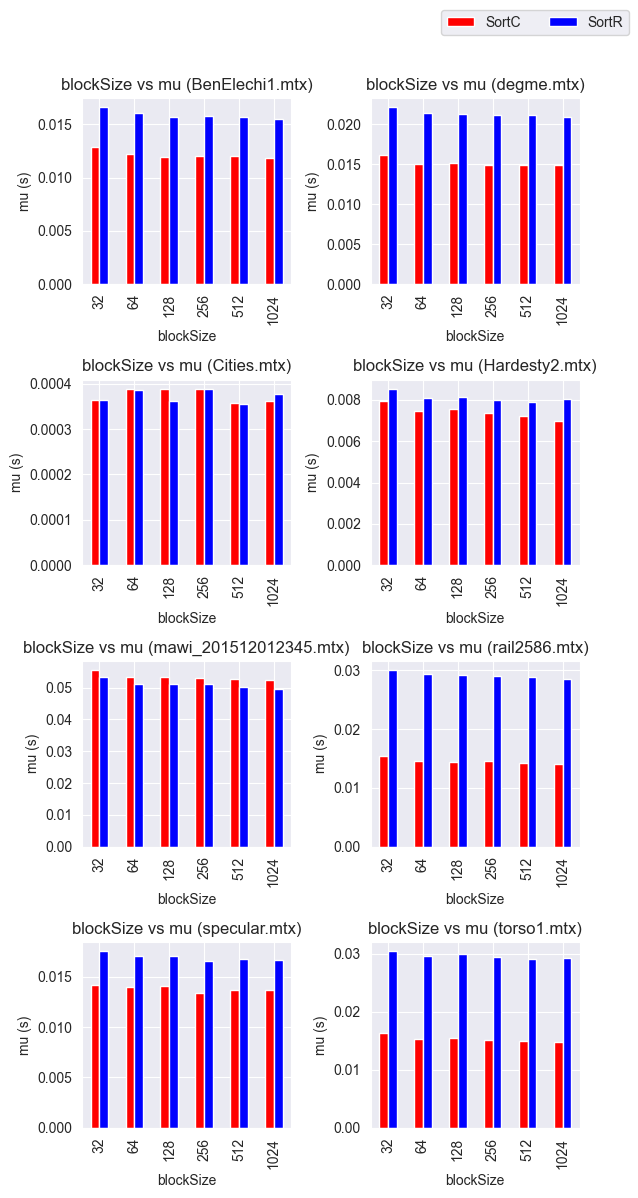

In [366]:

dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO1"]

# Set up subplots
n_fields = len(fields_to_plot)
ncols = 2
nrows = (n_fields + 1) // ncols  # ensure enough rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 3 * nrows))
axes = axes.flatten()

# Plot each field
for i, field in enumerate(fields_to_plot):
    ax = axes[i]
    df_field = dfo[dfo["matrix"] == field]

    pivot_df = df_field.pivot_table(
        index="blockSize",
        columns="sort",
        values="mu",
        aggfunc="mean",
        fill_value=0
    ).sort_index()

    pivot_df.plot(
        kind="bar",
        ax=ax,
        color=colors,
        legend=False
    )
    ax.set_title(f"blockSize vs mu ({field})")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu (s)")

# Hide unused axes if fields_to_plot < total subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Title and legend
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Central legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.9, 1),
    ncol=len(labels)
)

plt.show()

In [367]:
ResultCOO1 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO1[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO1)




{'BenElechi1.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.01179, 'nMemAc': 214341920, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.136277, 'effBand': 18.180439}, 'degme.mtx': {'sort': 'SortC', 'blockSize': 512, 'mu': 0.014862, 'nMemAc': 260080896, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.093733, 'effBand': 17.499724}, 'Cities.mtx': {'sort': 'SortR', 'blockSize': 512, 'mu': 0.000356, 'nMemAc': 42944, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.007531, 'effBand': 0.120494}, 'Hardesty2.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.006966, 'nMemAc': 128663392, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.15442, 'effBand': 18.470727}, 'mawi_201512012345.mtx': {'sort': 'SortR', 'blockSize': 1024, 'mu': 0.049627, 'nMemAc': 608645120, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.766522, 'effBand': 12.264345}, 'rail2586.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.014098, 'nMemAc': 256363584, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.136525, 'effBand': 18.184394}, 'specular.mtx': {

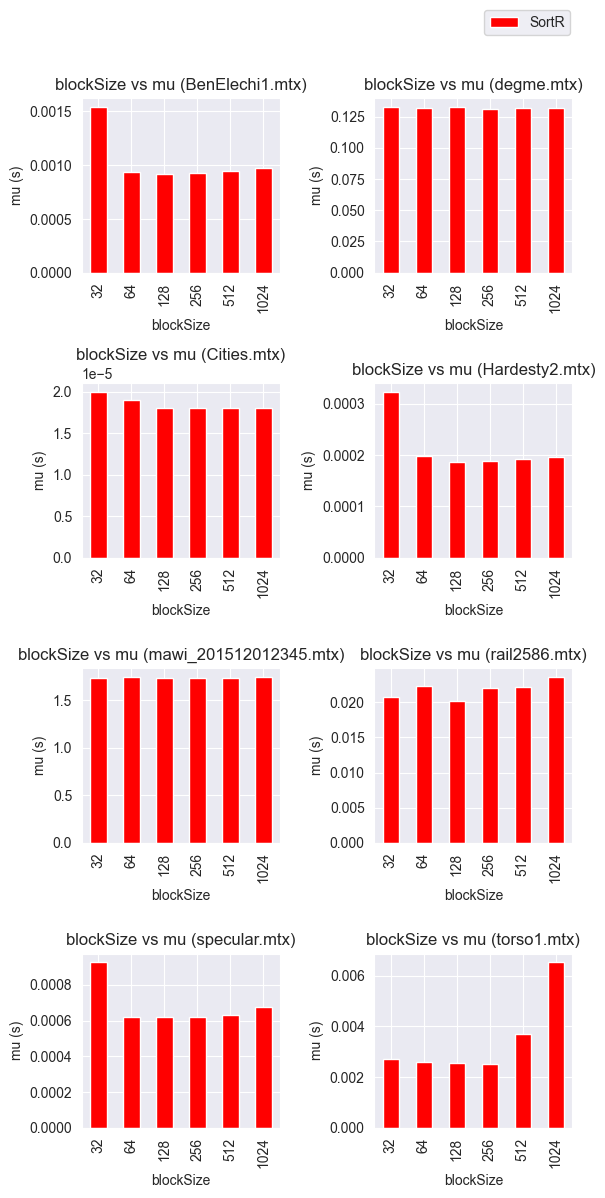

In [368]:


# Filter the DataFrame once
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO2"]

# Set up subplots
n_fields = len(fields_to_plot)
ncols = 2
nrows = (n_fields + 1) // ncols  # ensure enough rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 3 * nrows))
axes = axes.flatten()

# Plot each field
for i, field in enumerate(fields_to_plot):
    ax = axes[i]
    df_field = dfo[dfo["matrix"] == field]

    pivot_df = df_field.pivot_table(
        index="blockSize",
        columns="sort",
        values="mu",
        aggfunc="mean",
        fill_value=0
    ).sort_index()

    pivot_df.plot(
        kind="bar",
        ax=ax,
        color=colors,
        legend=False
    )
    ax.set_title(f"blockSize vs mu ({field})")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu (s)")

# Hide unused axes if fields_to_plot < total subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Title and legend
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Central legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.9, 1),
    ncol=len(labels)
)

plt.show()


In [369]:
ResultCOO2 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO2[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO2)

{'BenElechi1.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.000922, 'nMemAc': 162723424, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 14.532107, 'effBand': 176.519022}, 'degme.mtx': {'sort': 'SortR', 'blockSize': 256, 'mu': 0.130909, 'nMemAc': 196544672, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.124171, 'effBand': 1.501384}, 'Cities.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 1.8e-05, 'nMemAc': 32640, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.15328, 'effBand': 1.864035}, 'Hardesty2.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.000186, 'nMemAc': 103936744, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 43.236642, 'effBand': 558.838153}, 'mawi_201512012345.mtx': {'sort': 'SortR', 'blockSize': 512, 'mu': 1.731526, 'nMemAc': 605053064, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.021969, 'effBand': 0.349434}, 'rail2586.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.020233, 'nMemAc': 192293368, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.791894, 'effBand': 9.50375}, 'specular.mtx': {'sor

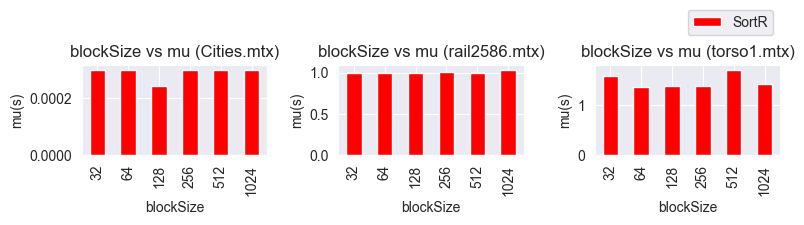

In [370]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO3"]
#print(df)

fields_to_plotCOO3 = ["Cities.mtx", "rail2586.mtx","torso1.mtx"]
#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)
#


fig, axes = plt.subplots(1, 3, figsize=(30, 12))



for ax, field in zip(axes.flatten(), fields_to_plotCOO3):
    df = dfo[dfo["matrix"] == field]
    pivot_df = df.pivot_table(index="blockSize", columns="sort", values="mu",
                     aggfunc='mean',
                     fill_value=0)
    pivot_df.sort_index(inplace=True)
    pivot_df.plot(kind="bar",ax=ax, figsize=(8, 2), color=colors, )
    ax.set_title(f"blockSize vs mu ({field})")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu(s)")
    ax.legend().remove()

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.001, 0.7, 1, 1))
plt.show()

In [371]:
ResultCOO3 = {}
for field in fields_to_plotCOO3:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO3[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO3)

{'Cities.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.000242, 'nMemAc': 161444, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.011069, 'effBand': 0.665795}, 'rail2586.mtx': {'sort': 'SortR', 'blockSize': 32, 'mu': 0.994489, 'nMemAc': 4204194672, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.016112, 'effBand': 4.227493}, 'torso1.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 1.374016, 'nMemAc': 3233478708, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.012397, 'effBand': 2.353304}}


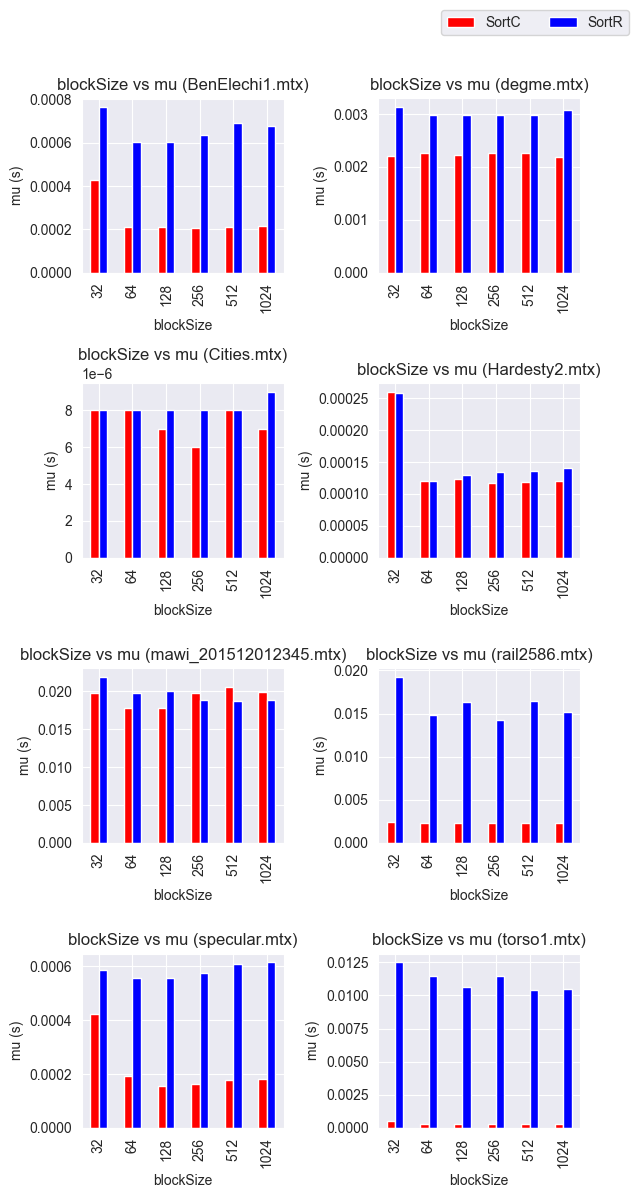

In [372]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO4"]
#print(df)


# Set up subplots
n_fields = len(fields_to_plot)
ncols = 2
nrows = (n_fields + 1) // ncols  # ensure enough rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 3 * nrows))
axes = axes.flatten()

# Plot each field
for i, field in enumerate(fields_to_plot):
    ax = axes[i]
    df_field = dfo[dfo["matrix"] == field]

    pivot_df = df_field.pivot_table(
        index="blockSize",
        columns="sort",
        values="mu",
        aggfunc="mean",
        fill_value=0
    ).sort_index()

    pivot_df.plot(
        kind="bar",
        ax=ax,
        color=colors,
        legend=False
    )
    ax.set_title(f"blockSize vs mu ({field})")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu (s)")

# Hide unused axes if fields_to_plot < total subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Title and legend
fig.tight_layout(rect=[0, 0, 1, 0.95])


# Central legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.9, 1),
    ncol=len(labels)
)

plt.show()

In [373]:
ResultCOO4 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO4[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO4)

{'BenElechi1.mtx': {'sort': 'SortC', 'blockSize': 256, 'mu': 0.000208, 'nMemAc': 160756440, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 64.314594, 'effBand': 771.775134}, 'degme.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.002193, 'nMemAc': 195060672, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 7.41355, 'effBand': 88.962596}, 'Cities.mtx': {'sort': 'SortC', 'blockSize': 256, 'mu': 6e-06, 'nMemAc': 32208, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 0.459841, 'effBand': 5.518092}, 'Hardesty2.mtx': {'sort': 'SortC', 'blockSize': 256, 'mu': 0.000117, 'nMemAc': 96497544, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 68.919886, 'effBand': 827.038632}, 'mawi_201512012345.mtx': {'sort': 'SortC', 'blockSize': 64, 'mu': 0.017823, 'nMemAc': 456483840, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 2.13439, 'effBand': 25.612675}, 'rail2586.mtx': {'sort': 'SortC', 'blockSize': 128, 'mu': 0.002241, 'nMemAc': 192272688, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 7.149407, 'effBand': 85.792881}, 'specular.mtx': {'sor

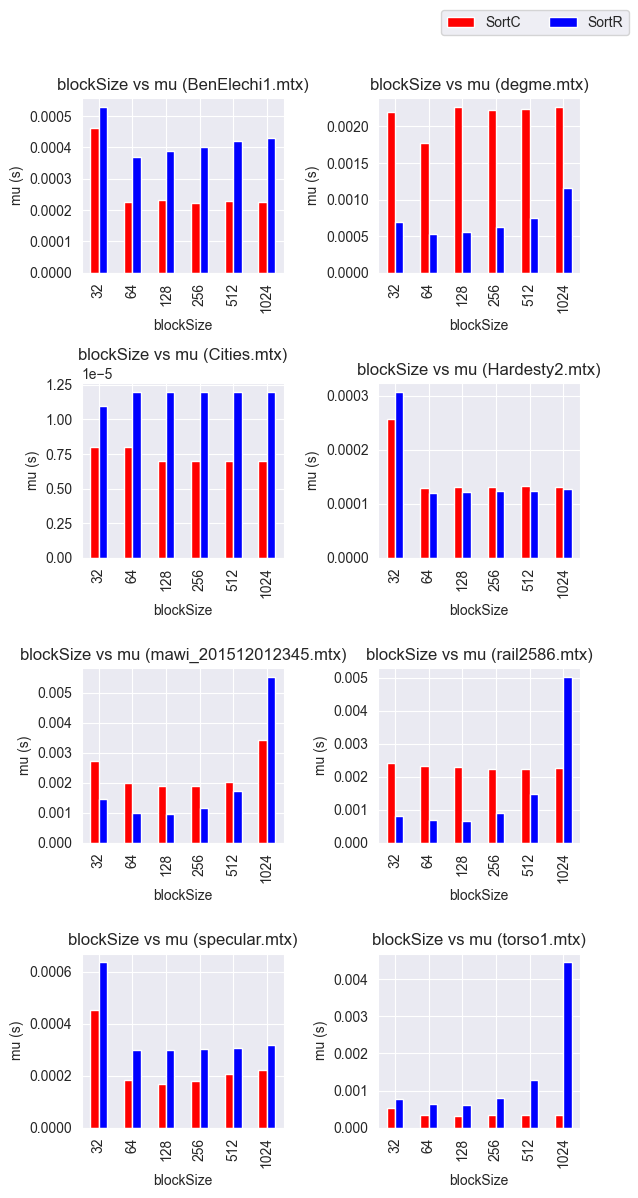

In [374]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO5"]

# Set up subplots
n_fields = len(fields_to_plot)
ncols = 2
nrows = (n_fields + 1) // ncols  # ensure enough rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 3 * nrows))
axes = axes.flatten()

# Plot each field
for i, field in enumerate(fields_to_plot):
    ax = axes[i]
    df_field = dfo[dfo["matrix"] == field]

    pivot_df = df_field.pivot_table(
        index="blockSize",
        columns="sort",
        values="mu",
        aggfunc="mean",
        fill_value=0
    ).sort_index()

    pivot_df.plot(
        kind="bar",
        ax=ax,
        color=colors,
        legend=False
    )
    ax.set_title(f"blockSize vs mu ({field})")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu (s)")

# Hide unused axes if fields_to_plot < total subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Title and legend
fig.tight_layout(rect=[0, 0, 1, 0.95])


# Central legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.9, 1),
    ncol=len(labels)
)

plt.show()

In [375]:
ResultCOO5 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO5[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO5)

{'BenElechi1.mtx': {'sort': 'SortC', 'blockSize': 256, 'mu': 0.000224, 'nMemAc': 161017224, 'AI': 0.1, 'Iperf': 93.3, 'flops': 59.834286, 'effBand': 719.176207}, 'degme.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.00053, 'nMemAc': 132779216, 'AI': 0.1, 'Iperf': 93.3, 'flops': 30.649746, 'effBand': 250.362058}, 'Cities.mtx': {'sort': 'SortC', 'blockSize': 128, 'mu': 7e-06, 'nMemAc': 292592, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.364041, 'effBand': 39.685329}, 'Hardesty2.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.00012, 'nMemAc': 72495848, 'AI': 0.1, 'Iperf': 93.3, 'flops': 67.132125, 'effBand': 605.213373}, 'mawi_201512012345.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.000948, 'nMemAc': 386350768, 'AI': 0.1, 'Iperf': 93.3, 'flops': 40.110808, 'effBand': 407.379366}, 'rail2586.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.000655, 'nMemAc': 128964744, 'AI': 0.1, 'Iperf': 93.3, 'flops': 24.452558, 'effBand': 196.815338}, 'specular.mtx': {'sort': 'SortC', 'blockSize': 128,

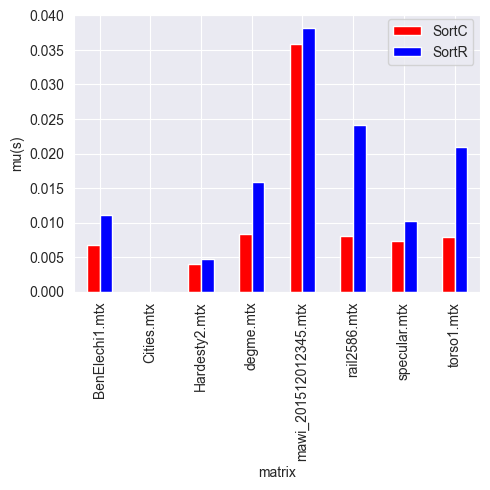

In [376]:
dfo = pd.DataFrame(dataC)
df = dfo

#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)


pivot_df = df.pivot_table(index="matrix", columns="sort", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar", figsize=(5, 5), color=colors)
plt.xlabel("matrix")
plt.ylabel("mu(s)")
plt.legend().remove()

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.001, 0.01, 1, 1))
plt.show()

In [377]:
ResultCPU = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCPU[field] = {"sort":df["sort"].iloc[0],"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCPU)

{'BenElechi1.mtx': {'sort': 'SortC', 'mu': 0.006716, 'nMemAc': 160756440, 'flops': 1.994695, 'effBand': 23.936337}, 'degme.mtx': {'sort': 'SortC', 'mu': 0.008283, 'nMemAc': 195060672, 'flops': 1.96246, 'effBand': 23.54952}, 'Cities.mtx': {'sort': 'SortC', 'mu': 1e-06, 'nMemAc': 32208, 'flops': 2.684, 'effBand': 32.208}, 'Hardesty2.mtx': {'sort': 'SortC', 'mu': 0.004083, 'nMemAc': 96497544, 'flops': 1.969595, 'effBand': 23.635139}, 'mawi_201512012345.mtx': {'sort': 'SortC', 'mu': 0.0359, 'nMemAc': 456483840, 'flops': 1.059625, 'effBand': 12.715498}, 'rail2586.mtx': {'sort': 'SortC', 'mu': 0.008122, 'nMemAc': 192272688, 'flops': 1.972877, 'effBand': 23.674529}, 'specular.mtx': {'sort': 'SortC', 'mu': 0.007408, 'nMemAc': 183542784, 'flops': 2.064663, 'effBand': 24.775959}, 'torso1.mtx': {'sort': 'SortC', 'mu': 0.007853, 'nMemAc': 204396000, 'flops': 2.168952, 'effBand': 26.027429}}


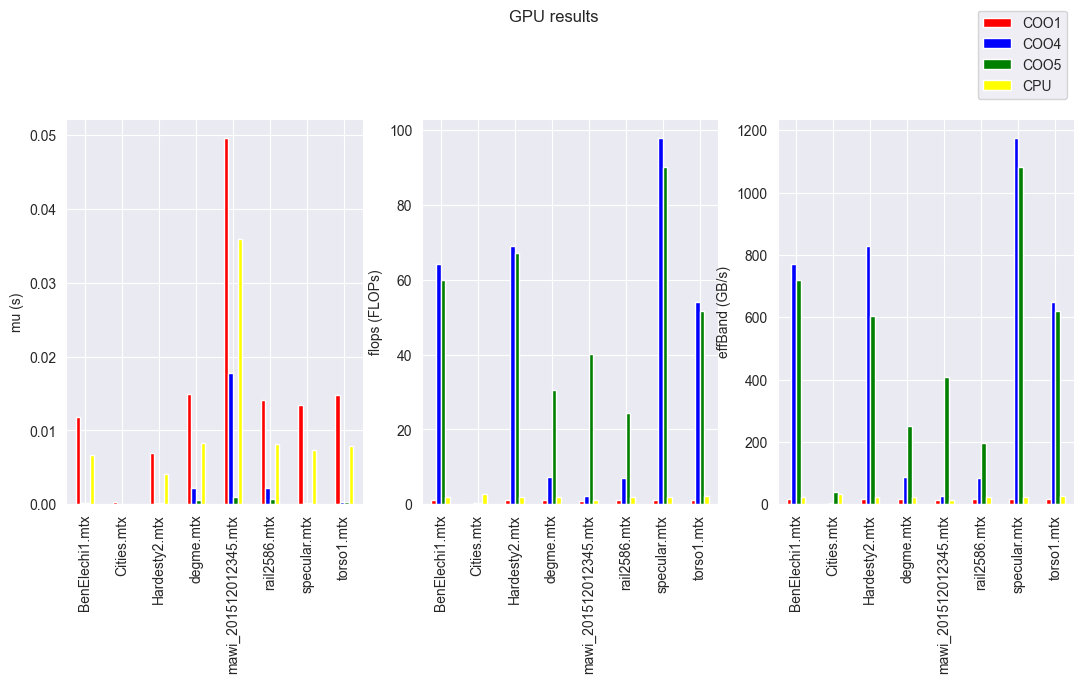

In [378]:

Results = {"id":[],"matrix":[],"sort":[],"blockSize":[],"mu":[],"nMemAc":[],"AI":[],"Iperf":[],"flops":[],"effBand":[]}

for matrix in ResultCOO1:
    Results["id"].append("COO1")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO1[matrix]["sort"])
    Results["blockSize"].append(ResultCOO1[matrix]["blockSize"])
    Results["mu"].append(ResultCOO1[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO1[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO1[matrix]["AI"])
    Results["Iperf"].append(ResultCOO1[matrix]["Iperf"])
    Results["flops"].append(ResultCOO1[matrix]["flops"])
    Results["effBand"].append(ResultCOO1[matrix]["effBand"])

for matrix in ResultCOO2:
    Results["id"].append("COO2")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO2[matrix]["sort"])
    Results["blockSize"].append(ResultCOO2[matrix]["blockSize"])
    Results["mu"].append(ResultCOO2[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO2[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO2[matrix]["AI"])
    Results["Iperf"].append(ResultCOO2[matrix]["Iperf"])
    Results["flops"].append(ResultCOO2[matrix]["flops"])
    Results["effBand"].append(ResultCOO2[matrix]["effBand"])

for matrix in ResultCOO3:
    Results["id"].append("COO3")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO3[matrix]["sort"])
    Results["blockSize"].append(ResultCOO3[matrix]["blockSize"])
    Results["mu"].append(ResultCOO3[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO3[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO3[matrix]["AI"])
    Results["Iperf"].append(ResultCOO3[matrix]["Iperf"])
    Results["flops"].append(ResultCOO3[matrix]["flops"])
    Results["effBand"].append(ResultCOO3[matrix]["effBand"])

for matrix in ResultCOO4:
    Results["id"].append("COO4")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO4[matrix]["sort"])
    Results["blockSize"].append(ResultCOO4[matrix]["blockSize"])
    Results["mu"].append(ResultCOO4[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO4[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO4[matrix]["AI"])
    Results["Iperf"].append(ResultCOO4[matrix]["Iperf"])
    Results["flops"].append(ResultCOO4[matrix]["flops"])
    Results["effBand"].append(ResultCOO4[matrix]["effBand"])

for matrix in ResultCOO5:
    Results["id"].append("COO5")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO5[matrix]["sort"])
    Results["blockSize"].append(ResultCOO5[matrix]["blockSize"])
    Results["mu"].append(ResultCOO5[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO5[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO5[matrix]["AI"])
    Results["Iperf"].append(ResultCOO5[matrix]["Iperf"])
    Results["flops"].append(ResultCOO5[matrix]["flops"])
    Results["effBand"].append(ResultCOO5[matrix]["effBand"])

for matrix in ResultCPU:
    Results["id"].append("CPU")
    Results["matrix"].append(matrix)
    Results["sort"].append("Null")
    Results["blockSize"].append(0)
    Results["mu"].append(ResultCPU[matrix]["mu"])
    Results["nMemAc"].append(ResultCPU[matrix]["nMemAc"])
    Results["AI"].append(0.0)
    Results["Iperf"].append(0.0)
    Results["flops"].append(ResultCPU[matrix]["flops"])
    Results["effBand"].append(ResultCPU[matrix]["effBand"])

RdataF = pd.DataFrame(Results)
df = RdataF[RdataF["id"] != "COO3"]
df = df[df["id"] != "COO2"]

#print(RdataF)


fig, axes = plt.subplots(1, 3, figsize=(30, 12))
fields_to_plot = ["mu","flops","effBand"]

for ax, field in zip(axes.flatten(), fields_to_plot):
    pivot_df = df.pivot_table(index="matrix", columns="id", values=field,  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #pivot_df = pivot_df.reset_index()
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    #ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("")
    if field == "mu":
        ax.set_ylabel("mu (s)")
    if field == "flops":
        ax.set_ylabel("flops (FLOPs)")
    if field == "effBand":
        ax.set_ylabel("effBand (GB/s)")
    ax.legend().remove()

#plt.tight_layout()
fig.suptitle("GPU results",y=1.1)
plt.legend(bbox_to_anchor=(0, 0.3, 1, 1))
plt.show()


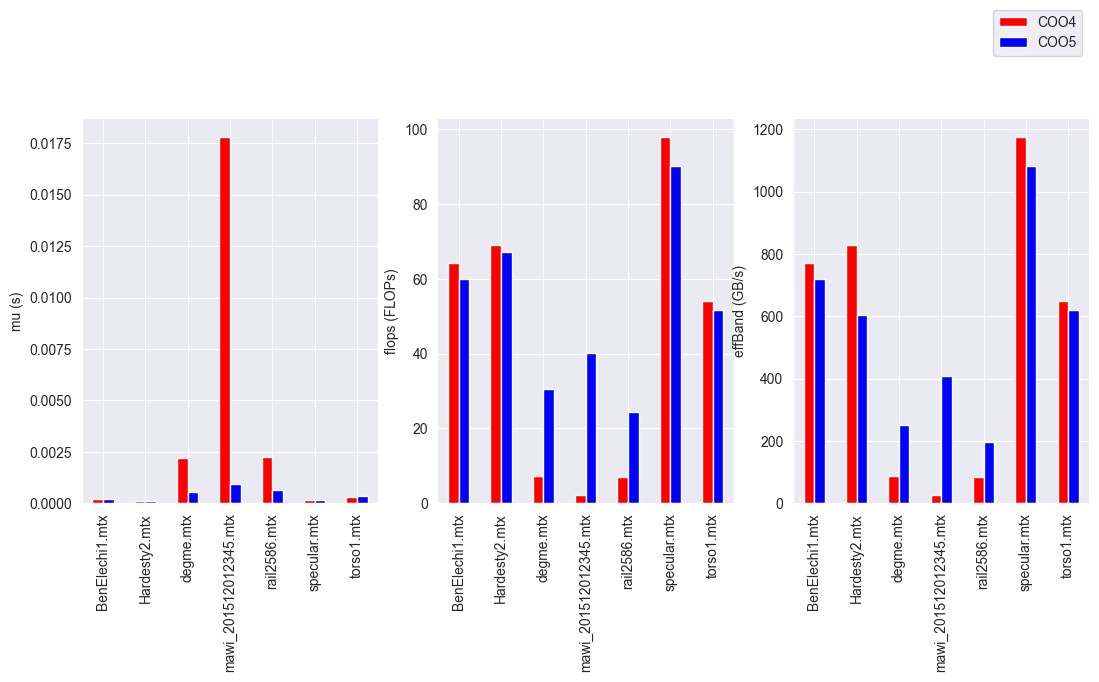

In [379]:
df = RdataF[RdataF["id"] != "COO3"]
df = df[df["id"] != "COO2"]
df = df[df["id"] != "COO1"]
df = df[df["id"] != "CPU"]
df = df[df["matrix"] != "Cities.mtx"]
df = df[df["id"] != "CPU"]

#print(RdataF)


fig, axes = plt.subplots(1, 3, figsize=(30, 12))
fields_to_plot = ["mu","flops","effBand"]

for ax, field in zip(axes.flatten(), fields_to_plot):
    pivot_df = df.pivot_table(index="matrix", columns="id", values=field,  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #pivot_df = pivot_df.reset_index()
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    #ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("")
    if field == "mu":
        ax.set_ylabel("mu (s)")
    if field == "flops":
        ax.set_ylabel("flops (FLOPs)")
    if field == "effBand":
        ax.set_ylabel("effBand (GB/s)")
    ax.legend().remove()

#plt.tight_layout()
plt.legend(bbox_to_anchor=(0, 0.3, 1, 1))
plt.show()

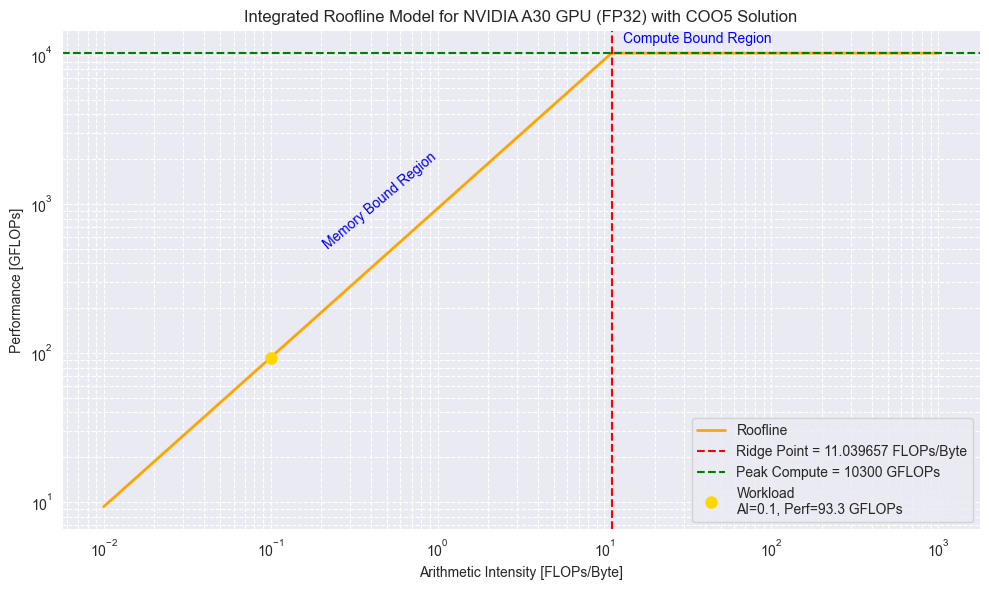

In [380]:
#Graph 5 roofline model for NVIDIA L40S for the best GPU solution
import numpy as np

# Define constants
ridge_point = 11.039657  # FLOPs/Byte
peak_performance = 10300  # GFLOPs

# Create x values (arithmetic intensity)
x = np.logspace(-2, 3, 500)  # From 0.1 to 1000 FLOPs/Byte

# Roofline model: minimum of memory bound and compute bound
memory_bandwidth = peak_performance / ridge_point
y = np.minimum(memory_bandwidth * x, peak_performance)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(x, y, label='Roofline', color='orange', linewidth=2)

# Ridge point line
plt.axvline(x=ridge_point, color='red', linestyle='--', label=f'Ridge Point = {ridge_point} FLOPs/Byte')

# Peak compute line
plt.axhline(y=peak_performance, color='green', linestyle='--', label=f'Peak Compute = {peak_performance} GFLOPs')

# GEMM workload point
plt.plot(0.1, 93.3, 'o', color='gold', markersize=8, label=f'Workload\nAI={0.1}, Perf={93.3} GFLOPs')

# Annotate regions
plt.text(0.2, 1e3 - 500, 'Memory Bound Region', rotation=40, color='blue')
plt.text(13, 1e4 + 2000, 'Compute Bound Region', rotation=0, color='blue')

# Labels and title
plt.xlabel('Arithmetic Intensity [FLOPs/Byte]')
plt.ylabel('Performance [GFLOPs]')
plt.title('Integrated Roofline Model for NVIDIA A30 GPU (FP32) with COO5 Solution')
plt.legend()
plt.grid(True, which="both", ls="--")

# Show the plot
plt.tight_layout()
plt.show()

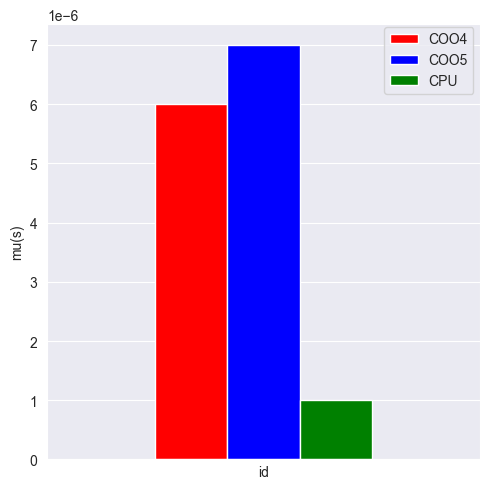

In [381]:
df = RdataF

df = RdataF[RdataF["id"] != "COO3"]
df = df[df["id"] != "COO2"]
df = df[df["id"] != "COO1"]
df = df[df["matrix"] == "Cities.mtx"]

#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)


pivot_df = df.pivot_table( columns="id", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar", figsize=(5, 5), color=colors)
plt.xlabel("id")
plt.ylabel("mu(s)")
plt.xticks([])
plt.legend().remove()

plt.tight_layout()
fig.suptitle("Cities.mtx: GPU vs CPU",y=1.1)
plt.legend(bbox_to_anchor=(0.001, 0.01, 1, 1))
plt.show()

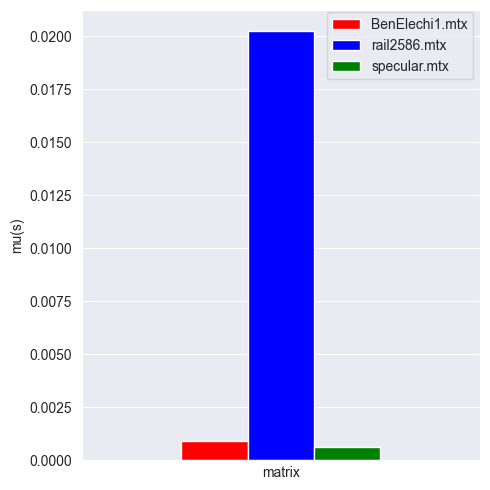

In [382]:


df = RdataF[RdataF["id"] == "COO2"]
df = df[df["matrix"] != "Cities.mtx"]
df = df[df["matrix"] != "degme.mtx"]
df = df[df["matrix"] != "Hardesty2.mtx"]
df = df[df["matrix"] != "mawi_201512012345.mtx"]
df = df[df["matrix"] != "torso1.mtx"]
#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)


pivot_df = df.pivot_table( columns="matrix", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar", figsize=(5, 5), color=colors)
plt.xlabel("matrix")
plt.ylabel("mu(s)")
plt.xticks([])
plt.legend().remove()

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.001, 0.01, 1, 1))
plt.show()

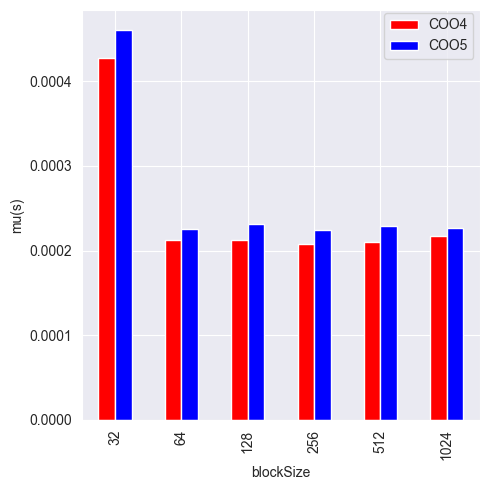

In [383]:
dfo = pd.DataFrame(data)
df = dfo
df = df[df["id"] != "COO2"]
df = df[df["id"] != "COO3"]
df = df[df["id"] != "COO1"]
df = df[df["sort"] != "SortR"]
df = df[df["matrix"] == "BenElechi1.mtx"]
#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)


pivot_df = df.pivot_table(index="blockSize", columns="id", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar", figsize=(5, 5), color=colors)
plt.xlabel("blockSize")
plt.ylabel("mu(s)")
plt.legend().remove()

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.001, 0.01, 1, 1))
plt.show()

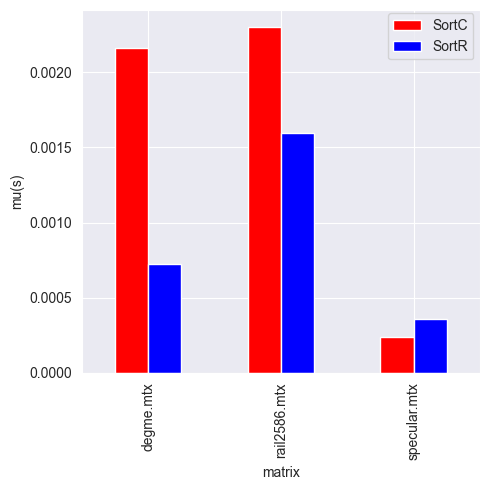

In [384]:
dfo = pd.DataFrame(data)
df = dfo
df = df[df["id"] != "COO2"]
df = df[df["id"] != "COO3"]
df = df[df["id"] != "COO1"]
df = df[df["id"] != "COO4"]

df = df[df["matrix"] != "mawi_201512012345.mtx"]
df = df[df["matrix"] != "Cities.mtx"]
df = df[df["matrix"] != "BenElechi1.mtx"]
df = df[df["matrix"] != "torso1.mtx"]
df = df[df["matrix"] != "Hardesty2.mtx"]

#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)


pivot_df = df.pivot_table(index="matrix", columns="sort", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar", figsize=(5, 5), color=colors)
plt.xlabel("matrix")
plt.ylabel("mu(s)")
plt.legend().remove()

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.001, 0.01, 1, 1))
plt.show()

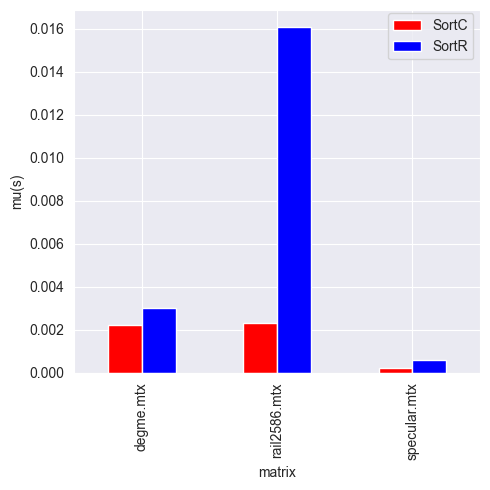

In [385]:
dfo = pd.DataFrame(data)
df = dfo
df = df[df["id"] != "COO2"]
df = df[df["id"] != "COO3"]
df = df[df["id"] != "COO1"]
df = df[df["id"] != "COO5"]

df = df[df["matrix"] != "mawi_201512012345.mtx"]
df = df[df["matrix"] != "Cities.mtx"]
df = df[df["matrix"] != "BenElechi1.mtx"]
df = df[df["matrix"] != "torso1.mtx"]
df = df[df["matrix"] != "Hardesty2.mtx"]

#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)


pivot_df = df.pivot_table(index="matrix", columns="sort", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar", figsize=(5, 5), color=colors)
plt.xlabel("matrix")
plt.ylabel("mu(s)")
plt.legend().remove()

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.001, 0.01, 1, 1))
plt.show()